Here, we look at a new dataset and try to answer some questions about it.

In [4]:
import pandas as pd

## Answers from part 3:

In [67]:
def handle_null_values(df):
    columns_drop_na = ['country', 'price', 'points']
    columns_fill_na = [col for col in df.columns if col not in columns_drop_na]

    df = df.loc[df[columns_drop_na].dropna().index]
    df.fillna('unknown', inplace=True)
    return df

In [68]:
fixed_wine = handle_null_values(wine)
assert fixed_wine.isnull().any().any() == False

NameError: name 'wine' is not defined

In [7]:
def NaNTaker(data):

    for i in data.columns:

        null_location = data[data[i].isnull()]

        if data[i].dtype in ['int64','float64']:

            data = data[~data.index.isin(null_location.index)]


            data.fillna('unknown', inplace=True)

    if data.isnull().any().any():
        print("some null data are still remaining")


    else:

        print("All null data have been removed")

    return data

# Exercises: Using Pandas

The following excerises use a dataset of liquor sales from the US State of Iowa to apply what we've learned so far.
Many of the exercises have multiple solutions.

In [9]:
df = pd.read_csv('../data/iowa_liquor/Iowa_Liquor_Sales.csv', index_col=0)

In [5]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [10]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

1) Which store had the highest total dollars of sales?
    - Is this the same store that had the highest volume (in liters) of alcohol sold?

Removing all "$"s in the DF so that those columns can be parsed as floats.

In [11]:
df = df.replace({'\$': ''}, regex=True)

In [12]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,18.09,27.14,6,162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,18.09,27.14,12,325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,6.40,9.60,2,19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,35.55,53.34,3,160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,6.40,9.60,2,19.20,0.30,0.08


In [13]:
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float')
df['State Bottle Cost'] = df['State Bottle Cost'].astype('float')

In [14]:
df.groupby('Store Name').sum()

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Store Name,,,,,,,,,,,,
218 Fuel Express & Chubby's Liquor,104706,714.0,22300950.0,6500.0,791991,258,20000,198.90,159,2505.45,157.13,41.50
3rd St Convenience,111435,1311.0,24523480.0,6040.0,925221,390,13600,272.71,380,2961.27,137.90,36.46
7 Rayos Liquor Store,399743,6592.0,110365287.0,26071.0,6299213,1039,113700,1388.58,1119,19115.97,1108.05,292.74
A J'S LIQUOR II,1023543,19295.0,236391792.0,57864.0,12631440,2515,204475,2391.68,2141,26628.12,1913.66,505.72
A To Z Liquor and Smoke Shop,497589,2538.0,147024014.0,37216.0,6731358,1666,143450,1464.77,612,8404.24,617.09,162.98
...,...,...,...,...,...,...,...,...,...,...,...,...
Xo Food And Liquor,224235,385.0,57201590.0,14981.0,2303146,1182,29350,335.08,999,5628.34,331.50,87.64
Xpress Liquor,16264,364.0,4117590.0,1287.0,110643,81,3075,54.84,62,430.26,21.23,5.62
Yr Dollar Stop,53746,627.0,11406860.0,2733.0,446682,204,5375,85.20,221,2441.45,92.25,24.38


In [63]:
df.groupby('Store Number').sum().sort_values(by='Sale (Dollars)', ascending=False).index[0]

2633

In [39]:
df.groupby('Store Number').sum().sort_values(by='Volume Sold (Liters)', ascending=False)['Volume Sold (Liters)'].head(1)

Store Number
2633    24239.25
Name: Volume Sold (Liters), dtype: float64

2) Which item has the highest cost per liter?

In [16]:
mydf = df.loc[:, ['Item Number', 'Volume Sold (Liters)', 'Sale (Dollars)']]
mydf.loc[:, 'Price per Liter'] = df.loc[:, 'Sale (Dollars)'] / df.loc[:, 'Volume Sold (Liters)']
mydf.sort_values(by='Price per Liter', ascending=False).head()

,Item Number,Volume Sold (Liters),Sale (Dollars),Price per Liter
98070,905502,0.75,845.10,1126.80
86510,965121,0.50,344.30,688.60
42336,903542,0.75,420.00,560.00
39948,3984,0.75,206.82,275.76
21645,3984,9.00,2472.84,274.76


3) What is the most common pack size?

In [26]:
df.groupby('Pack').count().sort_values(by='Date', ascending=False)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Pack,,,,,,,,,,,,,,,,,,,,,
12,60789,60789,60789,60789,60789,60789,60789,60789,60709,60709,...,60789,60789,60789,60789,60789,60789,60789,60789,60789,60789
6,26614,26614,26614,26614,26614,26614,26614,26614,26569,26569,...,26614,26614,26614,26614,26614,26614,26614,26614,26614,26614
24,8244,8244,8244,8244,8244,8244,8244,8244,8244,8244,...,8244,8244,8244,8244,8244,8244,8244,8244,8244,8244
48,2280,2280,2280,2280,2280,2280,2280,2280,2280,2280,...,2280,2280,2280,2280,2280,2280,2280,2280,2280,2280
10,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,...,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269
1,337,337,337,337,337,337,337,337,337,337,...,337,337,337,337,337,337,337,337,337,337
4,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110
5,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
8,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90


In [25]:
df['Pack'].mode()

0    12
dtype: int64

In [72]:
df['Pack'].value_counts().index[0]

12

4) What is the most commonly sold item?

In [27]:
df.groupby('Item Description').count().sort_values(by='Date', ascending=False).index[0]

'Black Velvet'

5) What day in 2015 was the most money made? (Across all stores)

In [28]:
# first, have to set the "date" column to be in datetime format.

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
date = df.set_index('Date')

In [31]:
date.groupby([date.index.year, date.index.month, date.index.day]).sum()['Sale (Dollars)'].idxmax()

(2015, 3, 16)

6) Which zip code drinks the most? (in liters)

In [32]:
df.groupby(['Zip Code']).sum()['Volume Sold (Liters)'].idxmax()

'52402'

7) Does the data set contain any null values?

In [33]:
df.isnull().any().any()

True

8) What is the average state bottle cost?
    - Max cost?
    - Min cost?
    - 50%?

In [34]:
df['State Bottle Cost'].describe()

count    100000.000000
mean          9.455181
std           6.787500
min           0.000000
25%           5.490000
50%           7.870000
75%          11.540000
max         563.400000
Name: State Bottle Cost, dtype: float64

9) What is the total volume sold in Iowa City in 2013?

In [35]:
i_c_2013 = date.groupby([date.index.year, 'City']).sum()
i_c_2013.loc[(slice(2013,2013), slice('IOWA CITY','IOWA CITY')), 'Volume Sold (Liters)']

Date  City     
2013  IOWA CITY    9063.01
Name: Volume Sold (Liters), dtype: float64

In [36]:
i_c_2013

Store Number  County Number    Category  Vendor Number  \
Date City                                                                
2012 ACKLEY            11597          230.0   3075260.0          906.0   
     ADAIR             31255            7.0   7222520.0         1730.0   
     ADEL             132100          775.0  32138262.0         7614.0   
     AFTON             18124          352.0   4186790.0         1134.0   
     AKRON             31675          525.0   7361290.0         1697.0   
...                      ...            ...         ...            ...   
2015 WINTERSET        218310         4148.0  71046177.0        17841.0   
     WINTHROP          34352           80.0   8333240.0         2464.0   
     WOODBINE          68000          731.0  17789782.0         4764.0   
     WOODWARD           9154           50.0   2023400.0          200.0   
     ZWINGLE           24425          245.0   5116560.0         1302.0   

                Item Number  Pack  Bottle Volume (ml)  State Bottle Cost  \
Date City                                                                  
2012 ACKLEY           82772    24                4250              27.46   
     ADAIR           245296    60                6250              93.60   
     ADEL           1294540   362               25275             245.62   
     AFTON           181566    30                4000              43.50   
     AKRON           333556   108                4125              52.82   
...                     ...   ...                 ...                ...   
2015 WINTERSET      2922485   894               62525             585.49   
     WINTHROP        301744    82                8050              71.99   
     WOODBINE        722463   198               13500             119.20   
     WOODWARD         38602    24                1500              19.76   
     ZWINGLE         155355    60                5375              30.69   

                Bottles Sold  Sale (Dollars)  Volume Sold (Liters)  \
Date City                                                            
2012 ACKLEY               24          311.10                 36.00   
     ADAIR                90         1863.60                 73.50   
     ADEL                175         2018.72                142.90   
     AFTON                30          467.94                 28.50   
     AKRON                29          313.31                 15.75   
...                      ...             ...                   ...   
2015 WINTERSET           554         5925.63                461.04   
     WINTHROP             68          924.16                 66.75   
     WOODBINE            101          952.23                 79.25   
     WOODWARD             18          225.00                 13.50   
     ZWINGLE              48          322.47                 36.00   

                Volume Sold (Gallons)  
Date City                              
2012 ACKLEY                      9.51  
     ADAIR                      19.42  
     ADEL                       37.73  
     AFTON                       7.53  
     AKRON                       4.16  
...                               ...  
2015 WINTERSET                 121.80  
     WINTHROP                   17.63  
     WOODBINE                   20.94  
     WOODWARD                    3.57  
     ZWINGLE                     9.51  

[1416 rows x 12 columns]

In [37]:
df[df['Date'].dt.year == 2013].groupby('City').sum().loc['IOWA CITY']['Volume Sold (Liters)']

9063.01

10) Which month (average, across all years) sees the highest sales?

In [44]:
date.groupby(date.index.month).sum()['Sale (Dollars)'].idxmax()

10

11) Which item has the lowest cost per bottle in a pack?

In [57]:
df.loc[:, 'Cost/bottle'] = df.loc[:, 'State Bottle Cost'] / df.loc[:,'Pack']

In [60]:
df.loc[:, ['Item Description', 'Cost/bottle']].sort_values(by=['Cost/bottle'])

,Item Description,Cost/bottle
36283,Paramount Apricot Flavored Brandy,0.00
84668,Lady Bligh Spiced Rum,0.00
41591,Lady Bligh Spiced Rum,0.00
39885,Paramount Creme De Menthe/green,0.00
22117,Paramount Butterscotch Schnapps,0.00
...,...,...
91363,Absolut w/4-50mls,137.13
21645,Absolut w/4-50mls,137.13
2366,Absolut w/4-50mls,137.13
39948,Absolut w/4-50mls,137.88


12) What is the most popular item at Wilkie Liquors?

In [70]:
wilkie = df[df['Store Name']=='Wilkie Liquors']
wilkie.groupby('Item Description').sum().sort_values(by='Bottles Sold', ascending=False).index[0]

'Juarez Gold Dss'

In [71]:
# also looking at # of bottles sold.

In [78]:
wilkie = df[df['Store Name']=='Wilkie Liquors']
wilkie.groupby('Item Description').sum().sort_values(by='Bottles Sold', ascending=False)['Bottles Sold'][0]

1140

13) From which item does Wilkie Liquors earn the most of its revenue?

In [79]:
wilkie.groupby('Item Description').sum().sort_values(by=['Sale (Dollars)'], ascending=False).index[0]

'Juarez Gold Dss'

14) Do prices for the same item differ across different stores?

yes.

In [80]:
df[df['Item Description'] == 'Captain Morgan Spiced Rum'][['Store Name','State Bottle Cost']].head()

,Store Name,State Bottle Cost
124,"Brothers Market, Inc.",17.75
129,Geno's Liquor,11.30
238,Hy-Vee Food Store / Cedar Falls,10.99
364,Pit Stop Liquor and Tobacco,5.00
476,LIQUOR AND GROCERY DEPOT,5.00


In [81]:
item_group = pd.DataFrame(df.groupby(['Item Number', 'Store Name'])['State Bottle Cost'].mean())
item_group.groupby('Item Number').agg({'State Bottle Cost' : pd.Series.nunique}).sort_values('State Bottle Cost', ascending=False).head()

,State Bottle Cost
Item Number,
12408,39.0
26827,38.0
43338,33.0
21598,32.0
26826,31.0


15) Which store sells the most liquor in the city of Des Moines?

In [32]:
cities = df.groupby(['City','Store Name']).sum()
cities.loc['DES MOINES', 'Volume Sold (Liters)'].sort_values(ascending=False).head(1)

Store Name
Hy-Vee #3 / BDI / Des Moines    24239.25
Name: Volume Sold (Liters), dtype: float64

In [86]:
mydf = df[df['City'] == 'DES MOINES'].groupby('Store Name').sum().sort_values(by='Volume Sold (Liters)', ascending=False)
mydf.head(10)

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Cost/bottle
Store Name,,,,,,,,,,,,,
Hy-Vee #3 / BDI / Des Moines,2269646,66374.0,902459322.0,233036.0,54806988,9492,791000,10381.91,24787,383131.12,24239.25,6403.78,1110.443333
Central City 2,3105047,49511.0,671906237.0,158493.0,34560227,7001,583625,7643.81,16282,239440.83,15557.76,4110.35,889.570833
"Central City Liquor, Inc.",1749810,61523.0,836391373.0,206129.0,54907645,9367,719650,9226.07,9481,149196.21,8426.86,2226.56,1218.338898
Hy-Vee Food Store / Fleur / DSM,1119157,33649.0,456180152.0,106641.0,20786398,5299,399575,4545.77,4869,68540.01,4965.67,1311.89,640.403648
Hy-Vee Food Store #5 / Des Moines,523089,15939.0,215765507.0,58630.0,9346511,2120,216300,1846.48,2601,30199.84,3004.15,793.59,224.717000
Hy-Vee Food Store #2 / Des Moines,491208,14938.0,202421565.0,55274.0,8623828,2020,199200,1611.54,2570,28799.44,2947.74,778.78,189.738856
Hy-Vee Food Store #3 / Des Moines,793792,24178.0,327702952.0,83752.0,14070002,3795,301925,2798.85,3414,38339.41,2775.72,733.39,404.144458
Hy-Vee Drugstore / University / DSM,824564,24178.0,326485197.0,86695.0,13547581,3658,281700,3156.31,3317,37014.05,2609.01,689.49,541.882208
Hy-Vee Wine and Spirits #1,785473,23023.0,312562517.0,73955.0,12866287,3988,257201,2624.84,4199,32413.35,2390.59,631.67,312.464833


In [87]:
df[df['City']== 'DES MOINES'].groupby('Store Name').sum().sort_values('Volume Sold (Liters)', ascending=False).head(1)

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Cost/bottle
Store Name,,,,,,,,,,,,,
Hy-Vee #3 / BDI / Des Moines,2269646,66374.0,902459322.0,233036.0,54806988,9492,791000,10381.91,24787,383131.12,24239.25,6403.78,1110.443333


16) Make a plot about at least one of these questions:

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

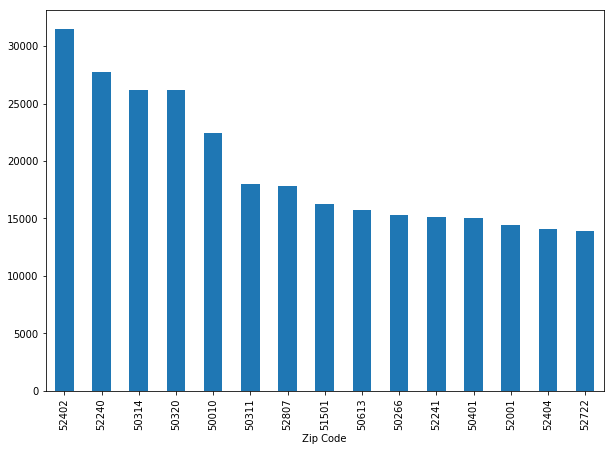

In [34]:
df.groupby(['Zip Code']).sum()['Volume Sold (Liters)'].sort_values(ascending=False).iloc[:15].plot(kind='bar', figsize=(10,7))
plt.show()

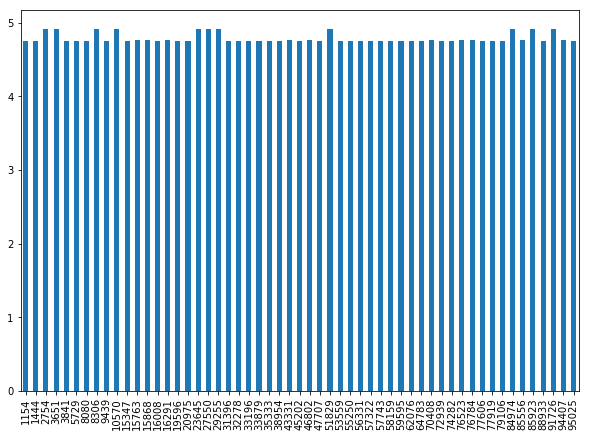

In [89]:
df[df['Item Description']=='Juarez Gold Dss']['State Bottle Cost'].plot(kind='bar', figsize=(10,7));

Text(0,0.5,'Sales (Dollars)')

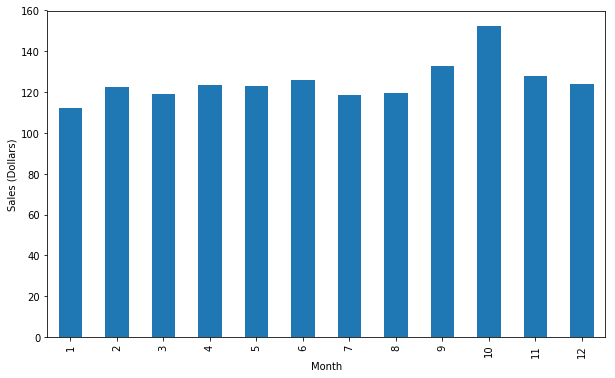

In [93]:
ax = sales_by_month["Sale (Dollars)"].plot(kind="bar", figsize=(10,6))
ax.set_xlabel("Month")
ax.set_ylabel("Sales (Dollars)")